# # Box Office Mojo WebScraping/Analysis

In [2]:
#Start Webscraping

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import requests
page = requests.get('https://www.boxofficemojo.com/year/2018/?grossesOption=totalGrosses&sortDir=asc&sort=releaseDate&ref_=bo_yld__resort')
page2 = requests.get('https://www.boxofficemojo.com/year/2019/?grossesOption=totalGrosses&sortDir=asc&sort=releaseDate&ref_=bo_yld__resort')


In [4]:
page2.status_code

200

In [5]:
from bs4 import BeautifulSoup as BS
url = "https://www.boxofficemojo.com/year/2018/?sort=gross&ref_=bo_yld__resort#table"
page=requests.get(url)
soup = BS(page.content, 'html.parser')
url2 = "https://www.boxofficemojo.com/year/2019/?sort=gross&ref_=bo_yld__resort#table"
page2=requests.get(url2)
soup2 = BS(page2.content, 'html.parser')

In [6]:
#Making lists from the scraped Data

In [7]:
titles = soup.find_all(class_='a-text-left mojo-field-type-release mojo-cell-wide')
titles2 = soup2.find_all(class_='a-text-left mojo-field-type-release mojo-cell-wide')
all_titles = []
for title in titles:
    all_titles.append(title.select('a')[0].string)
all_titles_2 = []
for title in titles2:
    all_titles_2.append(title.select('a')[0].string)


In [8]:
gross = soup.find_all(class_='a-text-right mojo-field-type-money mojo-estimatable')
gross_2 = soup2.find_all(class_='a-text-right mojo-field-type-money mojo-estimatable')
gross_list = []
for i in gross:
    gross_list.append(i.string)
gross_list2 = []
for i in gross_2:
    gross_list2.append(i.string)

In [9]:
theaters = soup.find_all(class_='a-text-right mojo-field-type-positive_integer')
theaters2 = soup2.find_all(class_='a-text-right mojo-field-type-positive_integer')
theater_list = []
for i in theaters:
    theater_list.append(i.string)
theater_list2 = []
for i in theaters2:
    theater_list2.append(i.string)

In [10]:
release_date = soup.find_all(class_ = 'a-text-left mojo-field-type-date a-nowrap')
release_date2 = soup2.find_all(class_ = 'a-text-left mojo-field-type-date a-nowrap')
release_date_list = []
for i in release_date:
    release_date_list.append(i.string)
release_date_list2 = []
for i in release_date2:
    release_date_list2.append(i.string)

In [11]:
distributor = soup.find_all(class_ = 'a-text-left mojo-field-type-studio')
distributor2 = soup2.find_all(class_ = 'a-text-left mojo-field-type-studio')
distributor_list = []
for i in distributor:
    distributor_list.append(i.get_text())
distributor_list2 = []
for i in distributor2:
    distributor_list2.append(i.get_text())

In [12]:
#create the dataFrame 

In [13]:
import numpy as np
movies_2018 = pd.DataFrame(list(zip(all_titles, gross_list, theater_list, release_date_list, distributor_list)),
                           columns =['Movie_Title','Gross_Revenue', 'Amount_of_Theaters', 'Realease_Date', 'Distributor'],)
movies_2019 = pd.DataFrame(list(zip(all_titles_2, gross_list2, theater_list2, release_date_list2, distributor_list2)),
                           columns =['Movie_Title','Gross_Revenue', 'Amount_of_Theaters', 'Realease_Date', 'Distributor'],)

In [14]:
#set the index

In [15]:
movies_2018.set_index('Movie_Title', inplace = True)
movies_2019.set_index('Movie_Title', inplace = True)

In [16]:
#No nulls. No duplicates. Moving on to changing datatypes for gross revenue, amount of theaters, and release date.

In [17]:
movies_2018['Gross_Revenue'] = movies_2018['Gross_Revenue'].str.replace(r'$', '')
movies_2018['Gross_Revenue'] = movies_2018['Gross_Revenue'].str.replace(r',', '')
movies_2019['Gross_Revenue'] = movies_2019['Gross_Revenue'].str.replace(r'$', '')
movies_2019['Gross_Revenue'] = movies_2019['Gross_Revenue'].str.replace(r',', '')

In [18]:
movies_2018['Amount_of_Theaters'] = movies_2018['Amount_of_Theaters'].str.replace(r',', '')
movies_2019['Amount_of_Theaters'] = movies_2019['Amount_of_Theaters'].str.replace(r',', '')
movies_2018['Distributor'] = movies_2018['Distributor'].str.rstrip('\n\n')
movies_2019['Distributor'] = movies_2019['Distributor'].str.rstrip('\n\n')

In [19]:
movies_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, Avengers: Endgame to Faustina: Love and Mercy
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gross_Revenue       200 non-null    object
 1   Amount_of_Theaters  200 non-null    object
 2   Realease_Date       200 non-null    object
 3   Distributor         200 non-null    object
dtypes: object(4)
memory usage: 7.8+ KB


In [20]:
#convert to integers

In [21]:
movies_2018['Gross_Revenue'] = pd.to_numeric(movies_2018['Gross_Revenue'])
movies_2019['Gross_Revenue'] = pd.to_numeric(movies_2019['Gross_Revenue'])
movies_2018['Amount_of_Theaters'] = pd.to_numeric(movies_2018['Amount_of_Theaters'])
movies_2019['Amount_of_Theaters'] = pd.to_numeric(movies_2019['Amount_of_Theaters'])
movies_2018['Realease_Date'] = movies_2018.Realease_Date.astype(str)
movies_2019['Realease_Date'] = movies_2019.Realease_Date.astype(str)


In [22]:
movies_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, Avengers: Endgame to Faustina: Love and Mercy
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gross_Revenue       200 non-null    int64 
 1   Amount_of_Theaters  200 non-null    int64 
 2   Realease_Date       200 non-null    object
 3   Distributor         200 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.8+ KB


In [23]:
movies_2018['Realease_Date'] = movies_2018.Realease_Date.astype(str)
movies_2019['Realease_Date'] = movies_2019.Realease_Date.astype(str)

In [24]:
#convert months to abbreviations

In [25]:
movies_2018['Realease_Date'] = movies_2018['Realease_Date'].map(lambda x: str(x)[0:3])
movies_2019['Realease_Date'] = movies_2019['Realease_Date'].map(lambda x: str(x)[0:3])

In [26]:
#count of the top grossing movies by month

In [27]:
top_grossing_2018 = movies_2018['Realease_Date'].value_counts()
top_grossing_2019 = movies_2019['Realease_Date'].value_counts()

In [28]:
movies_2018['Year']= 2018
movies_2019['Year']= 2019

In [29]:
#concat the DataFrames

In [30]:
df = pd.concat([movies_2018,movies_2019])

In [31]:
#We have the most Top Grossing Movies in December and November. The problem now is we have to see if that is
#because they released the most movies during that time frame or were they on par for the same amount of realeases
#as the other months

In [32]:
#Time to scrape some more data to get the total releases per month for calendar years 2018 and 2019

In [33]:
page3 = requests.get('https://www.boxofficemojo.com/month/by-year/2018/?grossesOption=calendarGrosses')
page3.status_code

200

In [34]:
url3 = "https://www.boxofficemojo.com/month/by-year/2018/?grossesOption=calendarGrosses"
page3=requests.get(url3)
soup3 = BS(page3.content, 'html.parser')
url4 = "https://www.boxofficemojo.com/month/by-year/2019/?grossesOption=calendarGrosses"
page4=requests.get(url4)
soup4 = BS(page4.content, 'html.parser')

In [35]:
months = soup3.find_all(class_='a-text-left mojo-header-column mojo-truncate mojo-field-type-named_interval mojo-sort-column')

In [36]:
month_list_2018 = []
for i in months:
    month_list_2018.append(i.get_text())

In [37]:
amount_of_realeases = soup3.find_all(class_='a-text-right mojo-field-type-positive_integer')
amount_of_realeases2 = soup4.find_all(class_='a-text-right mojo-field-type-positive_integer')
#the second one is for 2019, the first is 2018

In [38]:
amount_of_realeases_2018 =[]
for i in amount_of_realeases:
    amount_of_realeases_2018.append(i.get_text())
amount_of_realeases_2019 =[]
for i in amount_of_realeases2:
    amount_of_realeases_2019.append(i.get_text())


In [39]:
#New DataFrame with the info

In [40]:
number_of_releases = pd.DataFrame(list(zip(month_list_2018, amount_of_realeases_2018, amount_of_realeases_2019,)),
                           columns =['Months','Releases_in_2018', 'Releases_in_2019', ])
topGrossingValues = pd.DataFrame(list(zip(top_grossing_2018, top_grossing_2019)),
                           columns =['Releases_in_2018', 'Releases_in_2019', ])


In [41]:
topGrossingValues2019 = pd.DataFrame(top_grossing_2019)
topGrossingValues2018= pd.DataFrame(top_grossing_2018)
topGrossingValues2018.reset_index(inplace =True)
topGrossingValues2019.reset_index(inplace = True)
topGrossingValues2018.rename(columns ={'index':'Months'}, inplace = True)
topGrossingValues2019.rename(columns ={'index':'Months'}, inplace = True)
tgv18_19 = topGrossingValues2018.merge(topGrossingValues2019, on = 'Months',)

In [42]:
#merge with the previously scraped DataFrame so that we're only working on one

In [43]:
number_of_releases['Months']=number_of_releases['Months'].map(lambda x: str(x)[0:3])
releases = number_of_releases.merge(tgv18_19,on ='Months')
releases['Releases_in_2018'] = releases['Releases_in_2018'].astype(int)
releases['Releases_in_2019'] = releases['Releases_in_2019'].astype(int)
releases['sum_of_releases'] = releases['Releases_in_2018'] +releases['Releases_in_2019']
releases['sum_of_top_grossing'] = releases['Realease_Date_x'] + releases['Realease_Date_y']
releases['percent_of_top_grossing_movies_released'] = round((releases['sum_of_top_grossing']/releases['sum_of_releases'])*100,2)
releases = releases.sort_index(ascending = False)

In [44]:
#Create Graph

Text(0.5, 1.0, 'Chance that an individual movie will reach top 200 status for that year')

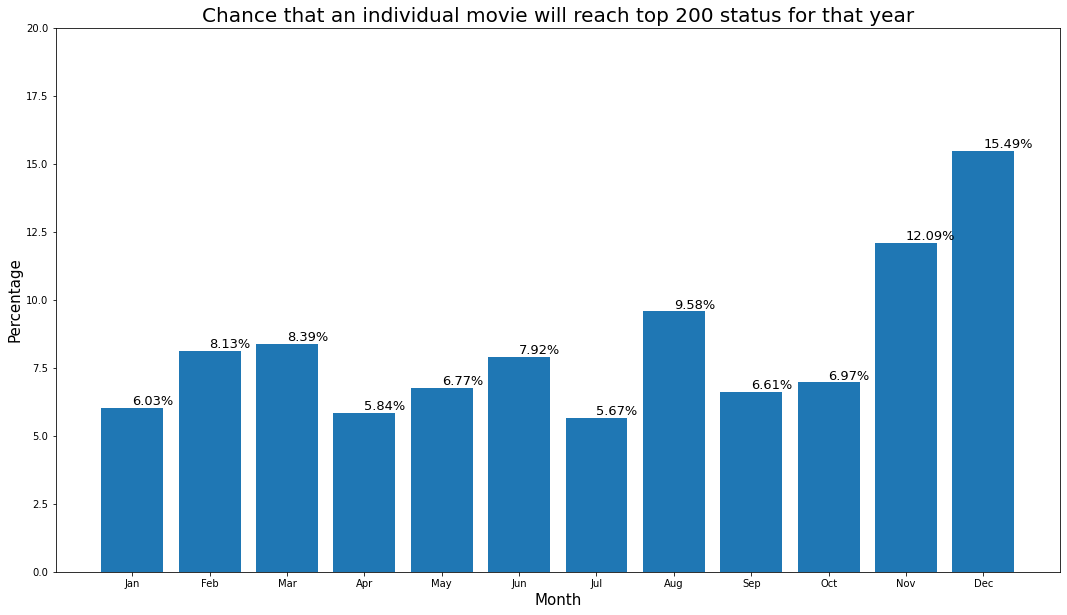

In [45]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(figsize=(18,10))
ax.bar(releases['Months'],height = releases['percent_of_top_grossing_movies_released'])
ax.set_ylim(0,20)
for index,data in enumerate(releases['percent_of_top_grossing_movies_released']):
    plt.text(x=index , y =data+.1 , s=f"{data}"+'%' , fontdict=dict(fontsize=13))
ax.set_xlabel('Month', size = 15)
ax.set_ylabel('Percentage', size =15)
ax.set_title('Chance that an individual movie will reach top 200 status for that year', size =20)

In [46]:
#Reading in a new DataFrame

In [50]:
df_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

# Budget Data

# Data Cleaning

In [51]:
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace('$','')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace('$','')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace('$','')
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(',','')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(',','')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace(',','')

In [52]:
df_budgets['production_budget'] = df_budgets['production_budget'].astype(int)
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].astype(int)
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].astype(int)

df_budgets['total_profit'] = df_budgets['worldwide_gross'] - df_budgets['production_budget']

In [53]:
df_budgets['year'] = pd.DatetimeIndex(df_budgets['release_date']).year
df_budgets = df_budgets.loc[df_budgets['year'] >= 2010]

In [54]:
df_budgets['ROI %'] = (df_budgets['total_profit'] / df_budgets['production_budget']) * 100

# Worth Spending the Big Buck$?

In [55]:
df_highbudget = df_budgets.loc[df_budgets['production_budget'] >= 150000000]

In [56]:
df_highbudget['Box Office Success'] = np.where(df_highbudget['ROI %'] > 250, True, False)
df_highbudget['Box Office Failure'] = np.where(df_highbudget['ROI %'] < 150, True, False)


<ipython-input-56-12655acf0e7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highbudget['Box Office Success'] = np.where(df_highbudget['ROI %'] > 250, True, False)
<ipython-input-56-12655acf0e7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highbudget['Box Office Failure'] = np.where(df_highbudget['ROI %'] < 150, True, False)


In [57]:
df_highbudget['Box Office Success'].value_counts()

False    77
True     59
Name: Box Office Success, dtype: int64

In [58]:
df_highbudget['Box Office Failure'].value_counts()

False    86
True     50
Name: Box Office Failure, dtype: int64

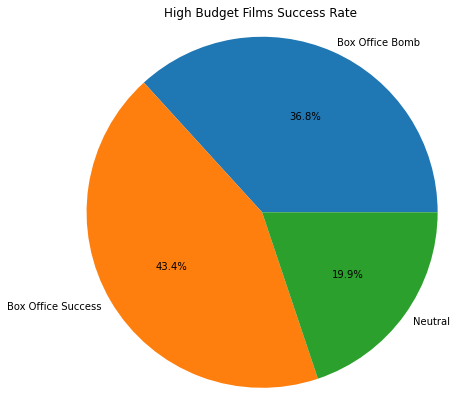

In [59]:
labels = 'Box Office Bomb', 'Box Office Success', 'Neutral'
amts = [50, 59, 27]

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(amts, labels = labels, autopct='%1.1f%%', labeldistance=1.06,)
ax.axis('equal')

plt.title('High Budget Films Success Rate');

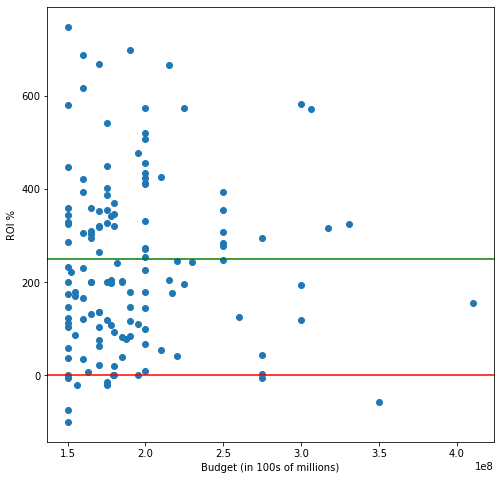

In [60]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(df_highbudget['production_budget'], df_highbudget['ROI %'] )
plt.xlabel('Budget (in 100s of millions)',)
plt.ylabel('ROI %')
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=250, color='g', linestyle='-');

In [61]:
df_highbudget.loc[df_highbudget['Box Office Success'] == True].head(4)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,year,ROI %,Box Office Success,Box Office Failure
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,324.384139,True,False
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,315.369636,True,False
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,571.016739,True,False
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,582.711400,True,False


In [66]:
import seaborn as sns

In [67]:
df_hb_bos = df_highbudget.loc[df_highbudget['Box Office Success'] == True]

In [68]:
type_list = ['Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Original', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Original', 'Franchise', 'Franchise', 'Franchise', 'Original', 'Original', 'Franchise', 'Franchise', 'Original', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Franchise', 'Original', 'Original', 'Original', 'Franchise', 'Original', 'Franchise', 'Franchise', 'Franchise', 'Original', 'Original', 'Original', 'Franchise', 'Franchise', 'Franchise', 'Original']
subtype = ['Marvel', 'Star Wars', 'Star Wars', 'Marvel', 'DC', 'Marvel', 'LOTR', 'LOTR', 'LOTR', 'Fast and Furious', 'Marvel', 'Jurassic Park', 'Transformers', 'Marvel', 'Incredibles', 'Star Wars', 'Finding Nemo', 'Toy Story', 'Marvel', 'Marvel', 'Live Action Remake', 'James Bond', 'Monsters Inc.', 'Marvel', 'Marvel', 'Transformers', 'Fast and Furious', 'Marvel', 'Live Action Remake', 'Harry Potter', 'Mission Impossible', 'Marvel', 'Live Action Remake', 'Animated', 'Marvel', 'DC', 'Animated', 'Jurassic Park', 'Marvel', 'Marvel', 'Marvel', 'Planet of the Apes', 'Shrek', 'Marvel', 'Animated', 'Original', 'Live Action Remake', 'DC', 'Original', 'Hunger Games', 'Fast and Furious', 'DC', 'Animated', 'Animated', 'Animated', 'Marvel', 'Mission Impossible', 'Kung Fu Panda', 'Original']
df_hb_bos['Type'] = type_list
df_hb_bos['Subtype'] = subtype

<ipython-input-68-207d04cda5a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hb_bos['Type'] = type_list
<ipython-input-68-207d04cda5a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hb_bos['Subtype'] = subtype


Text(0.5, 1.02, 'High Budget, High ROI Films by Type')

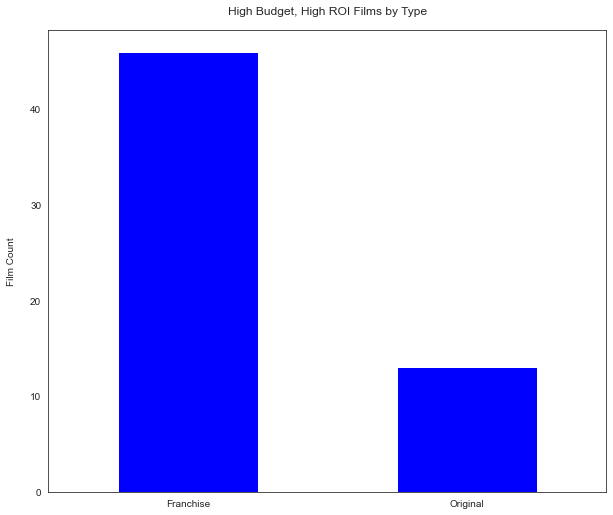

In [69]:
sns.set_style('white')
df_hb_bos['Type'].value_counts().plot(kind = 'bar', figsize = (10, 8.5), rot = 0, color = 'blue')
plt.ylabel('Film Count', labelpad = 14)
plt.title('High Budget, High ROI Films by Type', y = 1.02)


# ROI and Genre

In [70]:
highest_rois = df_budgets.loc[df_budgets['ROI %'] > 1000]

In [71]:
highest_rois.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,year,ROI %
621,22,"Jul 3, 2013",Despicable Me 2,76000000,368065385,975216835,899216835,2013,1183.180046
625,26,"Jul 8, 2016",The Secret Life of Pets,75000000,368384330,886750534,811750534,2016,1082.334045
629,30,"Jun 30, 2017",Despicable Me 3,75000000,264624300,1034727750,959727750,2017,1279.637000


In [72]:
genres_top100roi = {'Horror/Thriller': 45, 'Comedy' : 17, 'Drama/Romance' : 16, 'Sci-fi' : 5, 'Animation' : 5, 'Musical' : 3, 'Documentary' : 2, 'Sport' : 2, 'Adventure' : 1}




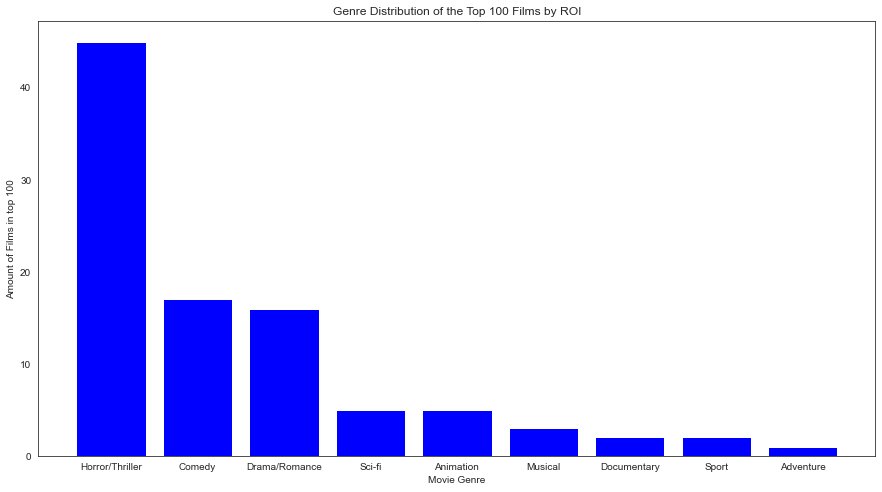

In [73]:
fig, ax = plt.subplots(figsize = (15, 8))

plt.bar(range(len(genres_top100roi)), genres_top100roi.values(), align='center', color = 'b')
plt.xticks(range(len(genres_top100roi)), list(genres_top100roi.keys()))


plt.xlabel('Movie Genre')
plt.ylabel('Amount of Films in top 100')
plt.title('Genre Distribution of the Top 100 Films by ROI')


plt.show()
